# 7 图像频域变换

## 傅里叶变换


### 傅里叶级数

若 $f:\mathbb R\rightarrow\mathbb R$ 满足一定周期性、光滑性**等**条件, 那么其有傅里叶级数 (Fourier series)
$$f(t) = \sum_{n=-\infty}^{+\infty}c_ne^{2\pi in t/ T}\Leftrightarrow 
c_n = \frac{1}{T}\int_{- T/2}^{ T/2}f(t)e^{-2\pi i nt/T}dt$$

### 傅里叶变换


若 $\int_{\mathbb R}f$ 可积, 定义其傅里叶变换 (Fourier transform, FT) 为
$$\hat f(u) = \int_{\mathbb R}\hat f (t)e^{-2\pi iut}du$$

### 傅里叶逆变换 

根据函数的傅里叶变换可求出原函数, 即傅里叶逆变换 (inverse Fourier transform, IFT):
$$f(t) = \int_{\mathbb R}\hat f (u)e^{2\pi iut}du$$

### 卷积定理


### 冲激函数

在 Borel 代数 $(\mathbb R,\mathcal B)$ 上, 冲激函数测度 (impulse / Dirac measure) 定义为 $\delta(A)=\mathbb I_{0\in A}$. 为了计算冲激函数的傅里叶变换, 需要定义更一般形式的傅里叶变换 [1, pp. 505-506]:

在 Borel 代数 $(\mathbb R,\mathcal B)$ 上, 若 $\mu(\mathbb R)<\infty$, 则其傅里叶变换为
$$\hat f (u)= \int_{\mathbb R}e^{-2\pi i ut}d\mu .$$

则冲激函数的傅里叶变换为 $\hat\delta (u)\equiv 1 $.

证: 按照测度论积分定义, 任取简单函数 $\varphi (x)= \sum_{k=1}^n \lambda_k \mathbb I_{x\in A_k}$ 且 $0\leqslant \varphi(t)\leqslant \max\{0,\cos(2\pi ut)\}$, 则
$$\int_{\mathbb R}\varphi(t)d\delta (t) = \sum_{k=1}^n \lambda_k \delta(A_k) = \sum_{k=1}^n \lambda_k \mathbb I_{0\in A_k}=\varphi(0)\leqslant 1.
$$
而 $\varphi(t) = \mathbb I_{t=0}$ 时上式可取等, 故 $\Re(\hat\delta)_+=1$. 又显然 $\Re(\hat\delta)_-=\Im(\hat\delta) = 0$, 故综上 $\hat\delta\equiv 1$.

## 离散傅里叶变换


### 离散傅里叶变换

离散傅里叶变换 (discrete Fourier transform, DFT) 与离散傅里叶逆变换 (inverse discrete Fourier transform, IDFT)

$$\hat f(m) =\sum_{k=0}^{M-1}f(t)e^{-2\pi itm/M}\quad\Leftrightarrow\quad  f(t)=\frac{1}{M}\sum_{k=0}^{M-1}\hat f(m)e^{2\pi itm/M}$$

### 高维离散傅里叶变换

例如二维离散傅里叶变换常用在图像处理中.

$$\hat f (u,v) = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)e^{-2\pi i(ux/M+vy/N)}$$

对于 $M\times N$ 的图像, 常常展示 $\widehat{f(x,y)(-1)^{x+y}}$, 因为这样的话
$$\widehat{f(x,y)(-1)^{x+y}}= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)e^{-2\pi i(\frac{(u-M/2)x}{M}+\frac{(v-N/2)y}{N})}=\hat f (u-\frac M2,v-\frac N2).
$$
从而 $\widehat{f(x,y)(-1)^{x+y}}(\frac M2,\frac N2)=\hat f(0,0)$, 即展示的图片中心对应原函数离散傅里叶变换的原点.

## 图像傅里叶变换

 `img_fft = np.fft.fftshift(np.fft.fft2(img))`

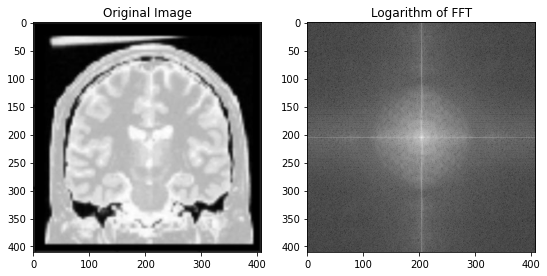

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\brain.png')).convert('L'))
plt.figure(figsize = (9, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

# the following line is the FFT code!
img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(img_fft) + 1e-12), cmap = 'gray')
plt.title('Logarithm of FFT')
plt.show()

图像傅里叶变换的高亮线 (与复数的辐角有关) 垂直于原图像的边缘 (edge).

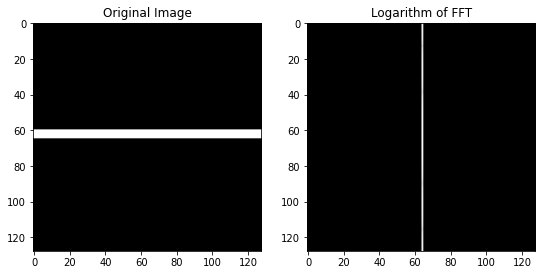

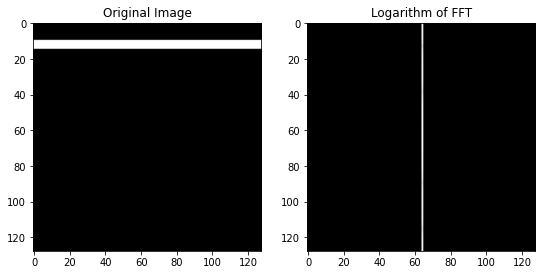

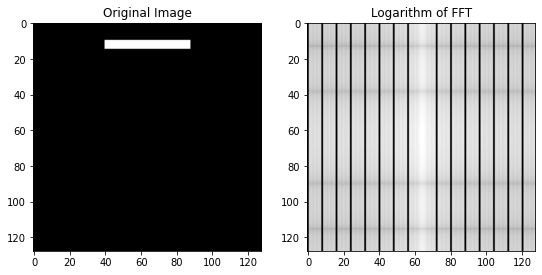

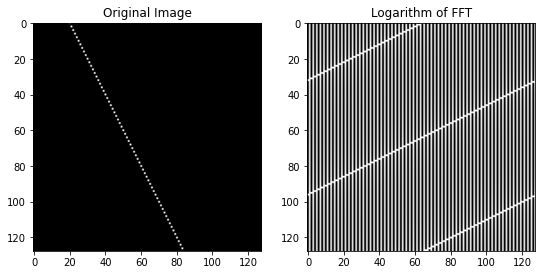

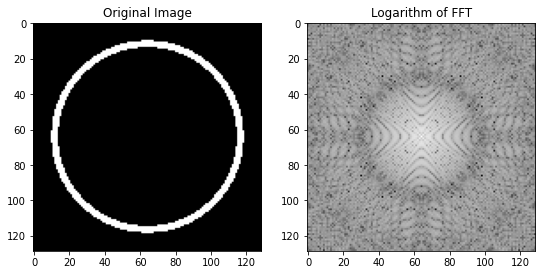

In [36]:
import numpy as np
from matplotlib import pyplot as plt 
for i in range(5):
    img = np.zeros((128, 128))
    if i == 0:
        img[60:65] = 1
    elif i == 1:
        img[10:15] = 1
    elif i == 2:
        img[10:15,40:-40] = 1
    elif i == 3:
        img.flat[20::257] = 1
        # img.flat[149::257] = 1
    elif i == 4:
        coor = np.meshgrid(np.arange(-img.shape[0]//2,img.shape[0]//2+1),np.arange(-img.shape[0]//2,img.shape[0]//2+1))
        img = np.where(np.abs((coor[0]**2+coor[1]**2) - img.size/6) < 200, 1, 0)
    plt.figure(figsize = (9, 5))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap = 'gray')
    plt.title('Original Image')

    # the following line is the FFT code!
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    plt.subplot(1,2,2)
    plt.imshow(np.log(np.abs(img_fft) + 1e-12), cmap = 'gray')#, vmin = -12, vmax = 1)
    plt.title('Logarithm of FFT')
    plt.show()

## 参考文献

1. 数学分析 之 课程讲义 (丘成桐数学英才班试用)